In [78]:
from sklearn.datasets import load_boston
import pandas as pd

In [79]:
boston = load_boston()

In [80]:
df = pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [81]:
#some in tuition
df['PRICE'] = boston.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [82]:
X = df.drop('PRICE', axis=1)
Y = df['PRICE']

In [83]:
X = X.as_matrix()
Y = Y.as_matrix()

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=10)
print(df.shape)
print(X_train.shape)
print(X_test.shape)

(506, 14)
(339, 13)
(167, 13)


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Simple Linear Regression

In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [90]:
import matplotlib.pyplot as plt

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

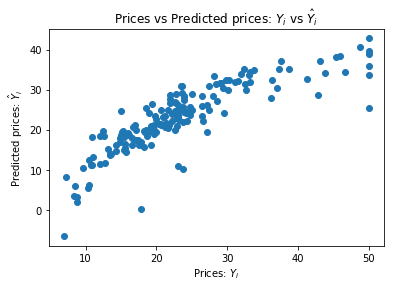

In [91]:
plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [92]:
from sklearn.metrics import mean_squared_error

In [93]:
MSE_lr=mean_squared_error(y_test,y_pred)
print('mean squared error =',MSE_lr)

mean squared error = 27.131691921497975


# Manual SGD Implementation

In [94]:
df_train=pd.DataFrame(X_train)
df_train.head()

df_train['PRICE'] = y_train

In [95]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,PRICE
0,-0.132968,-0.479280,1.167876,-0.250392,2.749511,-1.992829,0.964187,-1.103664,-0.540043,-0.058172,-1.777315,0.392614,2.365979,14.6
1,-0.414599,-0.479280,-1.180433,-0.250392,-0.830671,-0.165953,-1.294382,0.966408,-0.653052,0.098893,-0.759875,0.147219,-0.541158,19.8
2,1.317514,-0.479280,0.955177,-0.250392,1.259946,-2.061824,1.117129,-1.043290,1.607129,1.471764,0.766286,0.193350,2.521007,10.2
3,-0.410113,0.752065,-0.937554,-0.250392,-1.109420,0.339512,-1.781664,1.114787,-0.427034,-0.657349,-0.898616,0.262175,-0.929440,23.7
4,-0.393181,-0.479280,-0.207480,-0.250392,-0.072822,-0.243948,0.953516,-0.593652,-0.427034,0.110528,-0.343649,0.447653,0.596665,18.7


In [96]:
import numpy as np

In [97]:
#SGD implementation for linear regression
#function having parameter X_train,y_train,no of iteration,learning rate r
#intialising no of iteration=100,learning rate =0.01
#batch size=25



W,B,iteration,lr_rate,k=np.zeros(shape=(1,13)),0,750,0.01,25 #intialise W and B to zero

while iteration>=0:
    w,b,temp_vectors,temp_intercept=W,B,np.zeros(shape=(1,13)),0
    data=df_train.sample(25) #sampling random k=batch size=25 data
    x=np.array(data.drop('PRICE',axis=1))
    y=np.array(data['PRICE'])
    
    for i in range(k):
        temp_vectors+=(-2/k)*x[i]*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt w dl/dw=1/k(-2x)*(y-wTx-b)
        temp_intercept+=(-2/k)*(y[i]-(np.dot(w,x[i])+b))#partial differentiation wrt b dl/db=1/k(-2)*(y-wTx-b)
        
    W=(w-lr_rate*(temp_vectors))
    B=(b-lr_rate*(temp_intercept))
    
    iteration-=1
    
    
print(W)
print(B)
        


[[-1.22316265  1.45854475 -0.31113648  0.53548919 -1.6480404   2.75140904
   0.19147217 -2.99902462  1.81214407 -1.16502461 -1.64210997  1.27360391
  -3.72097005]]
[22.06173027]


In [98]:
y_pred_sgd = []
for i in range(len(X_test)):
    value = np.dot(W, X_test[i]) + B
    y_pred_sgd.append(np.asscalar(value))
print(y_pred_sgd)

[30.81969934831384, 32.519146990176836, 31.120438577637202, 24.02519098856819, 18.082340409349666, 16.083923445041698, 36.47003695987674, 14.692834566047624, 25.08750383328751, 37.82044161473875, 21.566723401387186, 31.52565683042885, 27.37178066125316, 33.9910191179699, 34.540927525884484, 41.40029464836316, 24.63290864705948, 22.303394971336157, 25.24838941820923, 21.85823284571413, 32.766816985428214, 17.711372044482577, 25.615543540967266, 25.18831610887063, 33.703288560539214, 20.111138401206652, 19.43083386562412, 16.836896475712624, 39.47960418711196, -1.0893299094914575, 33.276059500578334, 32.235733249021095, 26.81934026101841, 23.920910107580962, 20.558310170893513, 19.572826863313477, 3.282674447773534, 35.424711566615215, 26.746991319721513, 27.67049054643539, 35.12302724181785, 29.519311462025755, 18.240392252299035, 31.890854911799174, 17.710683652425782, 29.061598022945567, 19.26827628879575, 21.336626012385405, 38.502699688765745, 16.41566718533029, 24.014017986588115, 

In [99]:
MSE_sgd=mean_squared_error(y_test,y_pred_sgd)
print('mean squared error =',MSE_sgd)

mean squared error = 26.95623954024052


Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

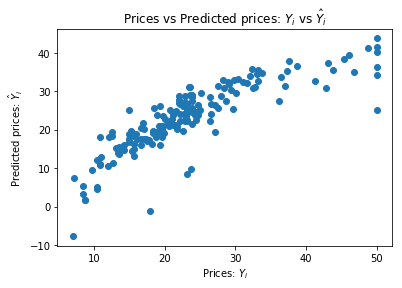

In [100]:
plt.scatter(y_test, y_pred_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

# Sklearn SGD Implementation

In [101]:
from sklearn.linear_model import SGDRegressor

In [102]:
sgd = SGDRegressor(learning_rate= 'constant', eta0= 0.01,max_iter= 750)
sgd.fit(X_train, y_train)
pred_sk_sgd = sgd.predict(X_test)
print(pred_sk_sgd)

[32.77068625 34.15005304 32.59924645 23.22155666 19.7805226  15.2292462
 38.11829931 13.90259586 26.63750095 39.15156923 21.50686809 32.92173407
 29.60637161 35.70034305 35.9155153  44.08390678 24.73069531 24.79556284
 26.89580462 23.09643961 34.65583447 16.28129898 26.29170281 25.61176134
 34.57185104 20.81599748 21.03312003 15.38500291 41.87110763 -1.52238132
 35.49562692 33.79964627 27.11597365 24.84312723 19.08516288 19.76823264
  1.79814804 36.55201196 27.89552672 29.2287152  35.91029129 31.19157345
 16.65821501 33.76772201 19.00357397 29.72968341 17.84104449 20.00453639
 41.04670271 16.41243404 25.82156542 17.94943716 25.55146326 36.2818378
 27.37697042 37.76556612 21.47665534 18.05360365 18.9842612  23.2475504
 19.44231025 24.1995617  42.58168437 46.37847014 31.98164868 16.33412533
 24.30738986  0.51384374 33.44780684 29.70873772 16.6458828  28.68827618
 17.96913323 24.45370519 25.32370417 10.22629714 41.18796288  5.66194035
 18.72926723 32.24480155 24.41694669 21.75006629 21.12

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

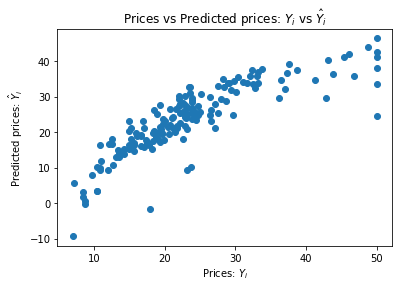

In [109]:
plt.scatter(y_test, pred_sk_sgd)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [103]:
MSE_sk_sgd=mean_squared_error(y_test,pred_sk_sgd)
print('mean squared error =',MSE_sk_sgd)

mean squared error = 29.154083999660536


In [108]:
#Comparison between weights obtained from own implementation and weights obtained from sgd implementation
from prettytable import PrettyTable    
p = PrettyTable()
p.field_names=['Weight vector manual','Weight vector SGD sklearn']
weight_sgd=sgd.coef_
for i in range(13):
    x.add_row([W[0][i],weight_sgd[i]])
print(x)    


+----------------------+---------------------------+
| Weight vector manual | Weight vector SGD sklearn |
+----------------------+---------------------------+
| -1.2231626488043312  |    -1.4455319196878949    |
|  1.4585447451320268  |     1.6163995283272254    |
| -0.31113648200685323 |    -0.3283948664235333    |
|  0.5354891881531175  |     0.523801042512286     |
| -1.6480404029325941  |    -1.9254437178530492    |
|  2.7514090420994393  |     2.454146381726289     |
| 0.19147216783624602  |     0.4615542333925869    |
| -2.9990246206515927  |    -3.4011793860633692    |
|  1.8121440725538447  |     2.355430032152284     |
| -1.1650246112608074  |    -2.4498257536025307    |
| -1.6421099695656156  |    -2.3702077105650017    |
|  1.2736039115519555  |     1.0159864825582632    |
|  -3.720970048494882  |     -4.016618372730207    |
| -1.2231626488043312  |    -1.4455319196878949    |
|  1.4585447451320268  |     1.6163995283272254    |
| -0.31113648200685323 |    -0.328394866423533

In [105]:
#comparison between MSE of own implementation and SGD sklearn implementation
print('MSE of Simple Linear Regression = ',MSE_lr)
print('-'*50)
print('MSE of manual implementation = ',MSE_sgd)
print('-'*50)
print('MSE of SGD sklearn implementation = ',MSE_sk_sgd)


MSE of Simple Linear Regression =  27.131691921497975
--------------------------------------------------
MSE of manual implementation =  26.95623954024052
--------------------------------------------------
MSE of SGD sklearn implementation =  29.154083999660536
